<a href="https://colab.research.google.com/github/FancyPhoenix/My-Machine-Learning-Projects/blob/main/health_insurence_predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis

In [37]:
#loading the data from csv file to a panda dataframe
insurance_dataset = pd.read_csv('/content/sample_data/insurance.csv')

In [38]:
#first file row of the data frame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
#number of row and columns
insurance_dataset.shape

(1338, 7)

In [40]:
#getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features
-sex
-smoker
-region

In [41]:
#checking the missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [42]:
#statistic terms of the dataset features
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

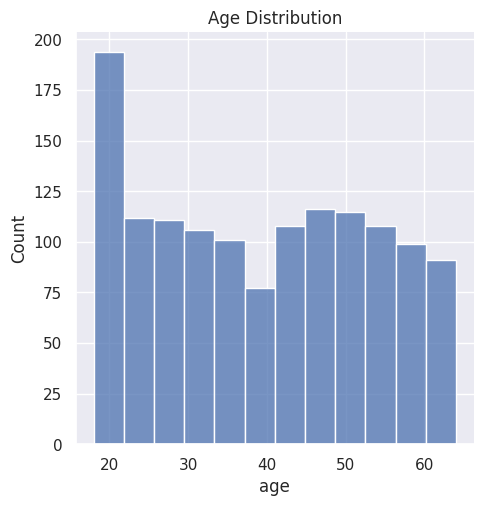

In [43]:
#the distribution of the each values
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

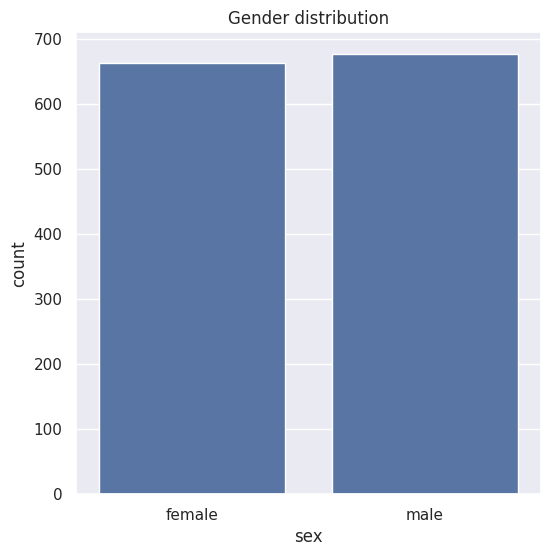

In [44]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title("Gender distribution")
plt.show()

In [45]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

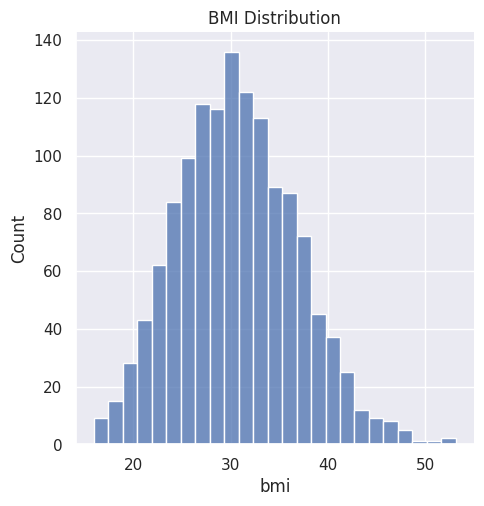

In [46]:
#bmi distibution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

Normal BMI range --> 18.5 to 24.9

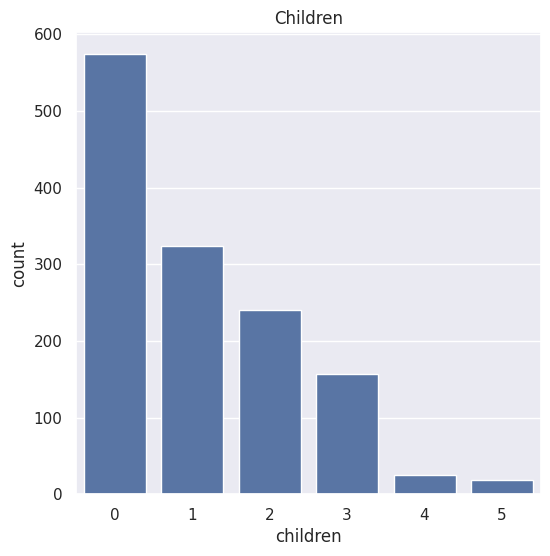

In [47]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [48]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


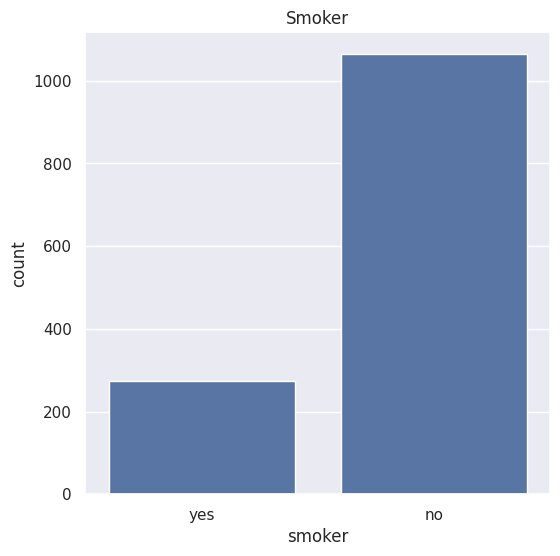

In [49]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title("Smoker")
plt.show()

In [50]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


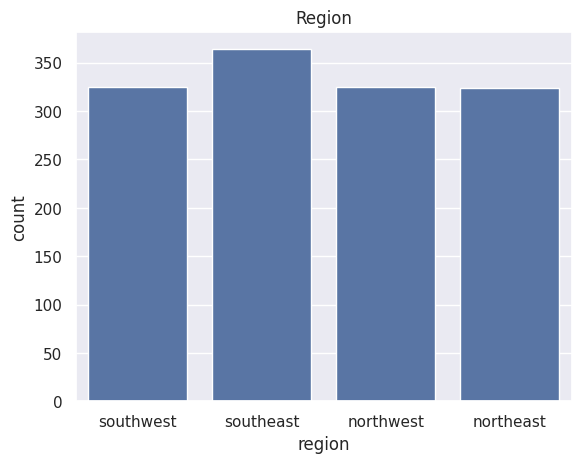

In [51]:
#region column
sns.countplot(x='region',data=insurance_dataset)
plt.title("Region")
plt.show()

In [52]:
#region data count
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 600x600 with 0 Axes>

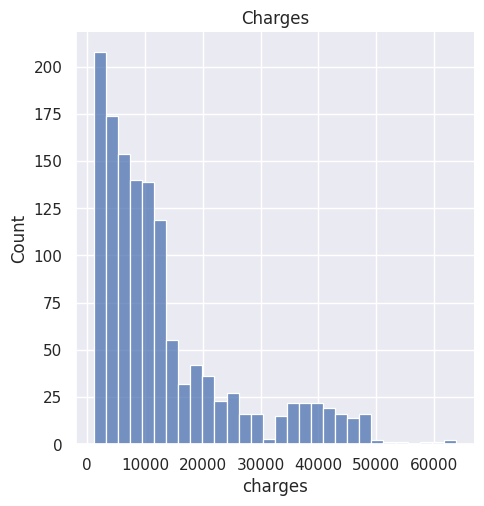

In [53]:
#distribution of charges
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges')
plt.show()

Data pre-processing

Catigorical data sets--> sex,smoker,region

Encoding the catigorical features

In [54]:
#encoding the sex feature
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)

#encoding the smoker column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

#encoding the region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

/tmp/ipython-input-2707805532.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)
/tmp/ipython-input-2707805532.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)
/tmp/ipython-input-2707805532.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to

Spliting the features from tergets

In [55]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']

In [56]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data insto training data and Testing data

In [57]:
X_train, X_test , Y_train ,Y_test = train_test_split(X , Y , test_size=0.2,random_state=2)

In [58]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression model

In [59]:
#loading the linear regression model
regressor = LinearRegression()

In [60]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [61]:
#predition on the training data
training_data_predition = regressor.predict(X_train)

In [64]:
#Jwb value
r2_value = metrics.r2_score(Y_train, training_data_predition)
print('R squared value: ',r2_value)

R squared value:  0.751505643411174


In [65]:
#predition on test data
test_data_predition = regressor.predict(X_test)


In [67]:
#R squared value on the test data
r2_test = metrics.r2_score(Y_test,test_data_predition)
print("R squared value on the test data: ", r2_test)

R squared value on the test data:  0.7447273869684076


Building the preditive system


In [77]:
input_data = (31, 1, 25.74 , 0 , 1, 0)

#changing input_data into a numpy array
input_data_as_array = np.array(input_data)

#reshape the array
input_data_reshaped = input_data_as_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print("The health insurence cost predition is: $",'{0:.2f}'.format(prediction[0]))

[3760.0805765]
The health insurence cost predition is: $ 3760.08


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
